<h1 align="center"><font color='black'>Atlanta crimes</font></h1>


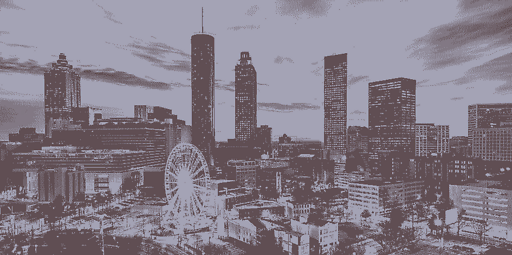

<h1 align="center"><font color='green'>Overview</font></h1>

 we have a dataset for the crimes that commited (from 2009 to 2017)..in **Atlanta city"GA state"** ,we're here trying to find some figures from this data, such as **time series analysis** to check whether the crime is dropping by time or not , and also we're trying to cluster **Atlanta** into **safe zones** and **danger zones** based on the density of the crime.

<font color='289C4E'> <h3>main goals</h3><font><a class='anchor' id='top'></a>
- [time series chaning](#1)
- [clustering Atlanta into safe and non safe places](#2)


In [1]:
#importing the necessary libraries
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np 

from sklearn.linear_model import LinearRegression



In [2]:
#importing our data
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))


/kaggle/input/atlantacrimedata/filename.csv
/kaggle/input/atlantacrimedata/atlcrime.csv
/kaggle/input/related-to-the-atlanta-project/danger zone.csv


In [3]:
#a glance in our data
raw_data=pd.read_csv(r'../input/atlantacrimedata/atlcrime.csv')
raw_data.head()

/opt/conda/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3166: DtypeWarning: Columns (5) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,Unnamed: 0,crime,number,date,location,beat,neighborhood,npu,lat,long
0,0,LARCENY-NON VEHICLE,103040029,10/31/2010,610 SPRING ST NW,509,Downtown,M,33.77101,-84.38895
1,1,AUTO THEFT,103040061,10/31/2010,850 OAK ST SW,401,West End,T,33.74057,-84.41680
2,2,LARCENY-FROM VEHICLE,103040169,10/31/2010,1344 METROPOLITAN PKWY SW,301,Capitol View Manor,X,33.71803,-84.40774
3,3,AUTO THEFT,103040174,10/31/2010,1752 PRYOR RD SW,307,Betmar LaVilla,Y,33.70731,-84.39674
4,4,LARCENY-NON VEHICLE,103040301,10/31/2010,JOHN WESLEY DOBBS AVE NE / CORLEY ST NE,604,Old Fourth Ward,M,33.75947,-84.36626


In [4]:
raw_data.columns

Index(['Unnamed: 0', 'crime', 'number', 'date', 'location', 'beat',
       'neighborhood', 'npu', 'lat', 'long'],
      dtype='object')

### columns: ###

* **crime**: the type of crime commited 
* **number**: the crime unique number
* **date**
* **location**: the address where the crime committed
* **beat** : the territory and time of a police officer patrols
* **neighborhood**
* **npu** : Neighbourhood Policing Unit
* **lat**: latitude
* **long**: longtitude

**note:**

since out main fouces is the time series analysis I only think ,I just need crime , date , lat and long , of course there is a use for the other columns. 

In [5]:
raw_data.drop(['Unnamed: 0','location','npu','beat','number','neighborhood'],axis=1,inplace=True)

In [6]:
raw_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 270688 entries, 0 to 270687
Data columns (total 4 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   crime   270688 non-null  object 
 1   date    270688 non-null  object 
 2   lat     270688 non-null  float64
 3   long    270688 non-null  float64
dtypes: float64(2), object(2)
memory usage: 8.3+ MB


In [7]:
data=raw_data
data.head()

,crime,date,lat,long
0,LARCENY-NON VEHICLE,10/31/2010,33.77101,-84.38895
1,AUTO THEFT,10/31/2010,33.74057,-84.41680
2,LARCENY-FROM VEHICLE,10/31/2010,33.71803,-84.40774
3,AUTO THEFT,10/31/2010,33.70731,-84.39674
4,LARCENY-NON VEHICLE,10/31/2010,33.75947,-84.36626


In [8]:
data.dropna(inplace=True)

In [9]:
data.dtypes

crime     object
date      object
lat      float64
long     float64
dtype: object

**we need to change date type from object to datetime**

In [10]:
data['date']=pd.to_datetime(data['date'])
data.sort_values(by='date',inplace=True)

In [11]:
data.dtypes

crime            object
date     datetime64[ns]
lat             float64
long            float64
dtype: object

In [12]:
data.head()

,crime,date,lat,long
91724,BURGLARY-RESIDENCE,2009-01-01,33.70171,-84.42404
91731,LARCENY-NON VEHICLE,2009-01-01,33.72667,-84.41946
91732,AUTO THEFT,2009-01-01,33.76045,-84.38556
91733,BURGLARY-RESIDENCE,2009-01-01,33.70449,-84.35193
91734,BURGLARY-NONRES,2009-01-01,33.81894,-84.38857


In [13]:
#reindexing 
data.reset_index(drop=True,inplace=True)

----------------------------------------------------------------------

<font color='289C4E'> <h2>Visualization</h2><font><a class='anchor' id='top'></a>
    
 we're aiming here to find out some figures by using graphes

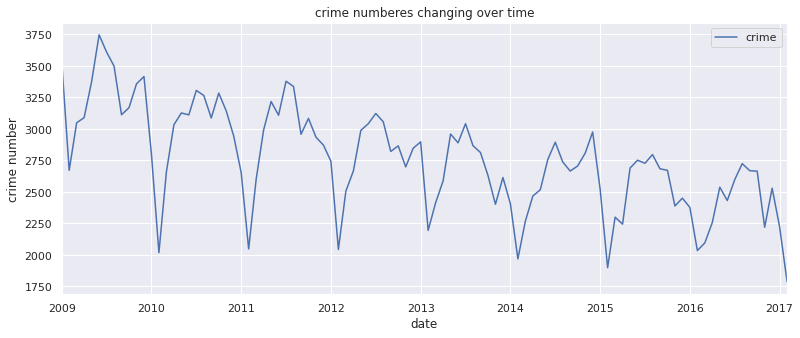

In [14]:
#first we will see how the crime is changing over time 

sns.set(rc={'figure.figsize':(13,5)})
data.groupby('date').count().resample('M').sum()[['crime']].plot()
plt.ylabel('crime number');
plt.title('crime numberes changing over time');

<font color='289C4E'> <h4>conclusion</h4><font><a class='anchor' id='top'></a>
    
* by looking there's a drop in crime numbers since 2009 to 2017 
    
* there are ups and down in the graph tho 
    
    
  let's dig deep in everyfigure to understand more
    
    

    
    

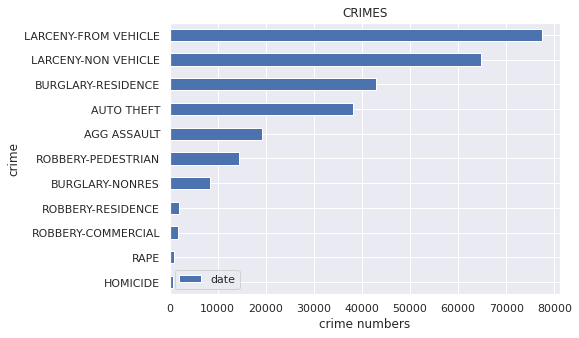

In [15]:
sns.set(rc={'figure.figsize':(7,5)})
data.groupby('crime').count()[['date']].sort_values(by='date').plot(kind='barh')
plt.xlabel('crime numbers')
plt.title('CRIMES');

**as we see here which crime is peaking , let's dig and see how every crime changing over time**

In [16]:
#prepareing our data to use it in linear regression

data['year']=pd.DatetimeIndex(data['date']).year
test=data.groupby(['crime','year']).count()[['lat']].reset_index()

In [17]:
#we going to use to linear regriesson 
#to help use see how the crime trend is going 

test=test.drop(test[test.year == 2017].index) #we will eliminate  2017 ,cuz it's not a complete year

#creating empty df and list to append in it
append_df=pd.DataFrame({'year': [0], 'crime': [0],'predict':[0],'crime_type':[0],'r value':[0]})
r_list=[]


for i in test.crime.unique():
    r_list=[]
    
    sinle_crime=test[test.crime==i]
    
    X = sinle_crime.iloc[:, 1].values.reshape(-1, 1)  # values converts it into a numpy array
    Y = sinle_crime.iloc[:, 2].values.reshape(-1, 1)  # -1 means that calculate the dimension of rows, but have 1 column
    z = sinle_crime.iloc[:, 0].values.reshape(-1, 1)  #crime type 
    
    for a in range(len(X)):
        r_list.append(np.corrcoef(X.flatten(),Y.flatten())[0][1])
        
    
    linear_regressor = LinearRegression()  # create object for the class
    linear_regressor.fit(X, Y)  # perform linear regression
    Y_pred = linear_regressor.predict(X)  # make predictions
    
    dataset = pd.DataFrame({'year':X[:, 0], 'crime': Y[:, 0],'predict':Y_pred[:,0],'crime_type':z[:, 0],'r value':r_list})
    frames = [append_df,dataset]
    append_df= pd.concat(frames)
    
    
    



In [18]:
crime_predict=append_df.drop(0).reset_index(drop=True)
crime_predict=crime_predict.sort_values('r value')
crime_predict

,year,crime,predict,crime_type,r value
27,2016,3409,3309.416667,BURGLARY-RESIDENCE,-0.992713
25,2014,4473,4454.107143,BURGLARY-RESIDENCE,-0.992713
24,2013,4910,5026.452381,BURGLARY-RESIDENCE,-0.992713
23,2012,5262,5598.797619,BURGLARY-RESIDENCE,-0.992713
22,2011,6405,6171.142857,BURGLARY-RESIDENCE,-0.992713
...,...,...,...,...,...
34,2016,107,98.583333,HOMICIDE,0.777895
32,2014,93,93.178571,HOMICIDE,0.777895
33,2015,92,95.880952,HOMICIDE,0.777895
28,2010,88,82.369048,HOMICIDE,0.777895


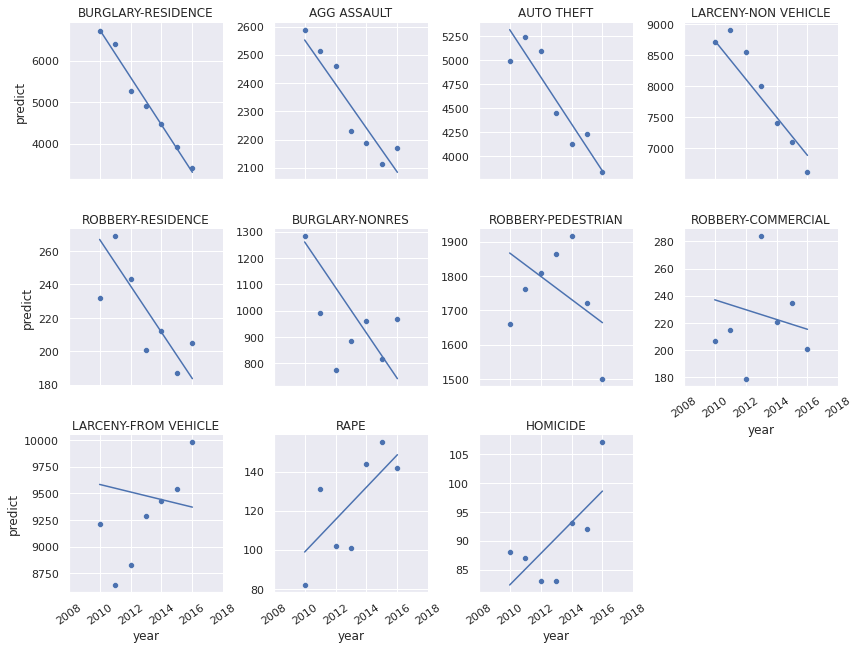

In [19]:
g = sns.FacetGrid(crime_predict, col="crime_type",col_wrap=4,sharey=False)
g.map_dataframe(sns.scatterplot,"year","crime", data=crime_predict);
g.map_dataframe(sns.lineplot,"year","predict", data=crime_predict);
g.set_titles(col_template="{col_name}", row_template="{row_name}");
g.set_xticklabels(rotation=35);

<font color='289C4E'> <h3>conclusion</h3><font><a class='anchor' id='top'></a>
    
as we see here it's not a dropping in crime , as we have **rape** and **homicide** are increasing big time , that suggest the crimes in **Atlanta** are going way high , and also the **larceny from vehicle** is also going up regardless of the line is showing otherwise

In [20]:
data['month'] = pd.DatetimeIndex(data['date']).month


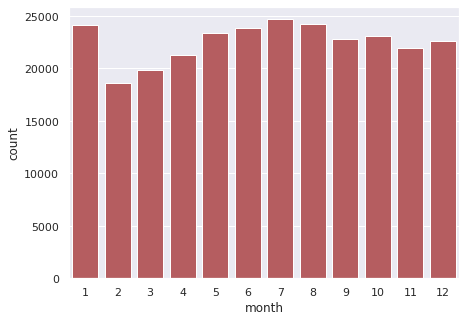

In [21]:
sns.countplot(x='month', data=data,color='r');

<font color='289C4E'> <h3>Observations</h3><font><a class='anchor' id='top'></a>
    
as we see the peak happens in **the first month** and ****the seventh month****  but why is that tho , let's google it and try to see the reason.
    
    
 <font color='289C4E'> <h3>Conclusion</h3><font><a class='anchor' id='top'></a>
*    we figured the reason that **the first month** has a high crime rate is because of the hoildays.
     
*     and for **the seventh month** is because of the heat , as it seems people tend to make more crimes with highest temperature.
     
     
>   you can check it from  [here](https://www.google.com/search?q=what+is+the+highest+month+in+crimes&oq=what+&aqs=chrome.0.69i59l2j69i57j69i59l2j69i60l3.976j0j4&sourceid=chrome&ie=UTF-8)

<font color='289C4E'> <h2>time series analysising conclusions</h2><font><a class='anchor' id='top'></a>
    
* the reason that the overall crime is going down ,as that really going down is the **misdemeanor**, while the **rape** and **homicide** is going way up 
    
 
* **the first and the seventh months** have the highest crime rate because of the hoildays and the tempreature respectively    

------------------------------------------------------------------------------


<font color='289C4E'> <h1>clustering Atlanta into safe and non safe places</h1><font><a class='anchor' id='top'></a>
    
    
 using the lat and long in our dataset we while try to figure where exactly the crime is spreading , and try to determine the safe and the danger zones

In [22]:
raw_data=pd.read_csv(r'../input/atlantacrimedata/atlcrime.csv')
data=raw_data.dropna()
data=data.drop(['Unnamed: 0','location','npu','beat','number','neighborhood'],axis=1)


/opt/conda/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3166: DtypeWarning: Columns (5) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


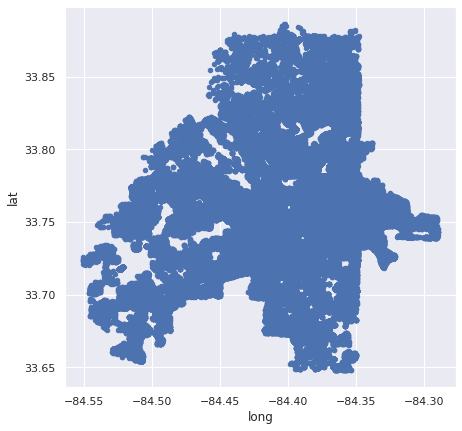

In [23]:
sns.set(rc={'figure.figsize':(7,7)})
data.plot.scatter(y='lat',x='long');


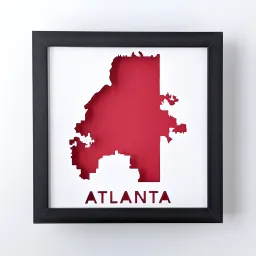

* using the **scatter plot** to drow a map of **Atlant** I could have used **plotly** , but I love the idea of how using data can drew Atlant as **good** as in a map


* tho there's no any figures we can see from the graph,so we going to divide our **goals** into two main goals :
1. figure where **evercrime** is **spreading**.
2. divide **Atlanta** into **safe** and **danger** zones.


<font color='289C4E'> <h3>figure where evercrime is spreading</h3><font><a class='anchor' id='top'></a>
    

In [24]:
#making a function that changing its alpha value based on the number of crimes for every unique crime
sns.set(rc={'figure.figsize':(7,7)})
def show(crime):
    data[['cri']]=(data[['crime']] == crime) * 1
    if data['cri'].sum() > len(data)/50:
        a=0.1
    else:
        a=1
    return data.plot.scatter(y='lat',x='long',c='cri',alpha=a,title=crime);

/opt/conda/lib/python3.7/site-packages/pandas/plotting/_matplotlib/tools.py:400: MatplotlibDeprecationWarning: 
The is_first_col function was deprecated in Matplotlib 3.4 and will be removed two minor releases later. Use ax.get_subplotspec().is_first_col() instead.
  if ax.is_first_col():


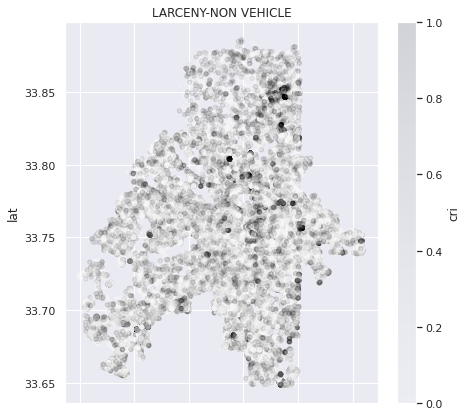

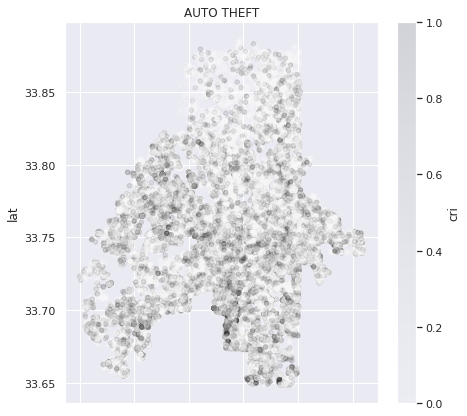

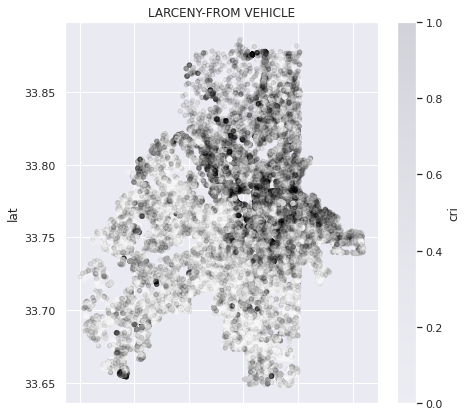

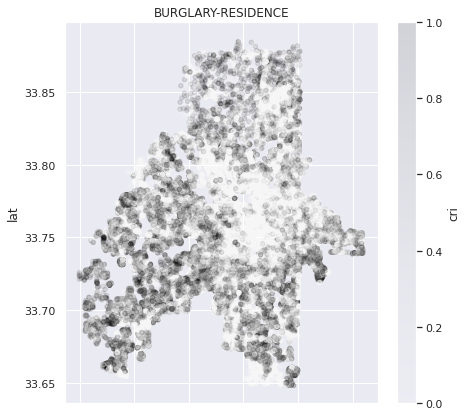

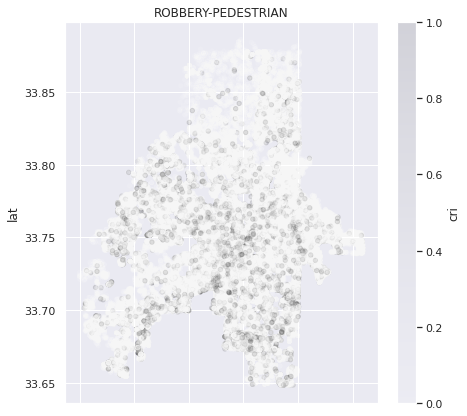

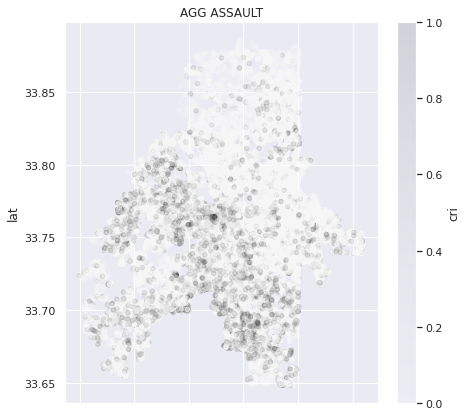

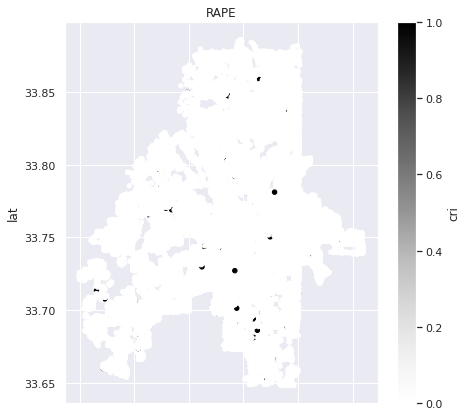

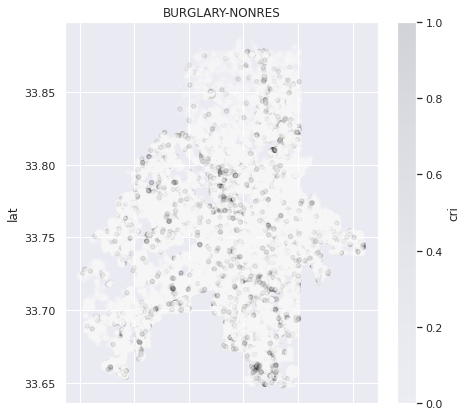

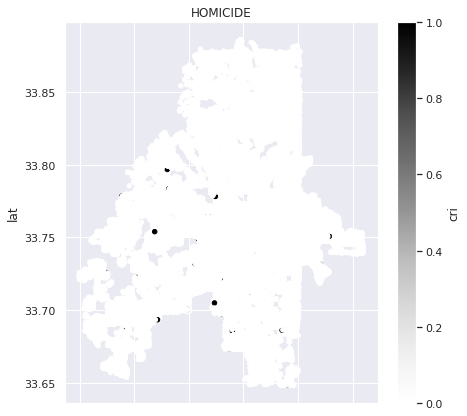

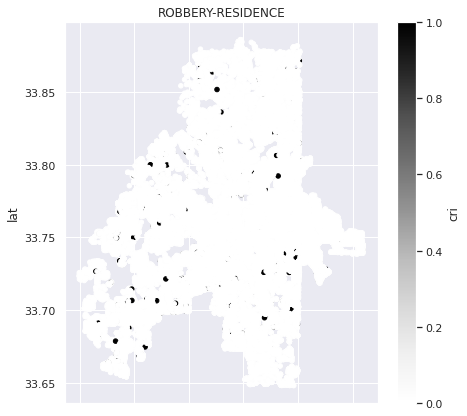

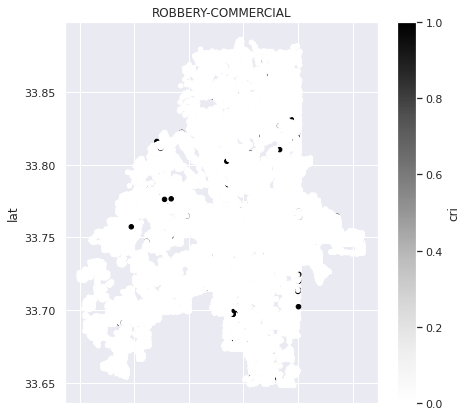

In [25]:
col=data['crime'].unique()
for i in col:
    show(i)

<font color='289C4E'> <h3>Observations</h3><font><a class='anchor' id='top'></a>
    
    
* **larceny-Non vehcial** : a few random spots
    
* **auto theft** : not specific

* **larceny-from vehcial** : Stationed in the nordic middler

* **burgalry-resdience** : pretty much Stationed excpet for middle is the safest

* **burgalr-nonres** : not specific

* **AGG assault** : in the westic middle , and the south

* **robbery pedestrain** :not specific

* **Robbery-residance** : It is common in specific places

* **rape** : It is common in specific places

* **robery** : It is common in specific places

* **Homicide** : It is common in specific places

--------------------------------------------------------------------------------------------------


<font color='289C4E'> <h2>divide Atlanta into safe and danger zones</h2><font><a class='anchor' id='top'></a>
    
    
    
>  we're going to use  **HDBSCAN** model in order to cluster the area into safe and danger zones 
    
    
 quick glance at **HDBSCAN** : **HDBSCAN** is a **density-based clustering** algorithm that is used to identify clusters of arbitrary shape in a dataset. It works by calculating the density of points in the dataset, based on a distance metric, and then clustering points that are close together into “clumps”. **HDBSCAN** is advantageous over other clustering algorithms because it does not require that the user pre-specify the number of clusters, and can identify clusters of arbitrary shape. It can also detect **outliers** in the dataset, which is useful for identifying points that are not part of any cluster. Overall, **HDBSCAN** is a powerful and flexible clustering tool
    
    

we are going to use the **HDBSCAN** outliuers detector in order to determine whiche area has **low crime density** 

In [26]:
#saving the dataset with only the lat and long in the drive in order to use it in google colab since its way faster
X=data[['lat', 'long']]

# X.to_csv('x.csv',index=False)

<font color='black'> <h3>using the google colab the run our HDBSCAN model</h3><font><a class='anchor' id='top'></a>


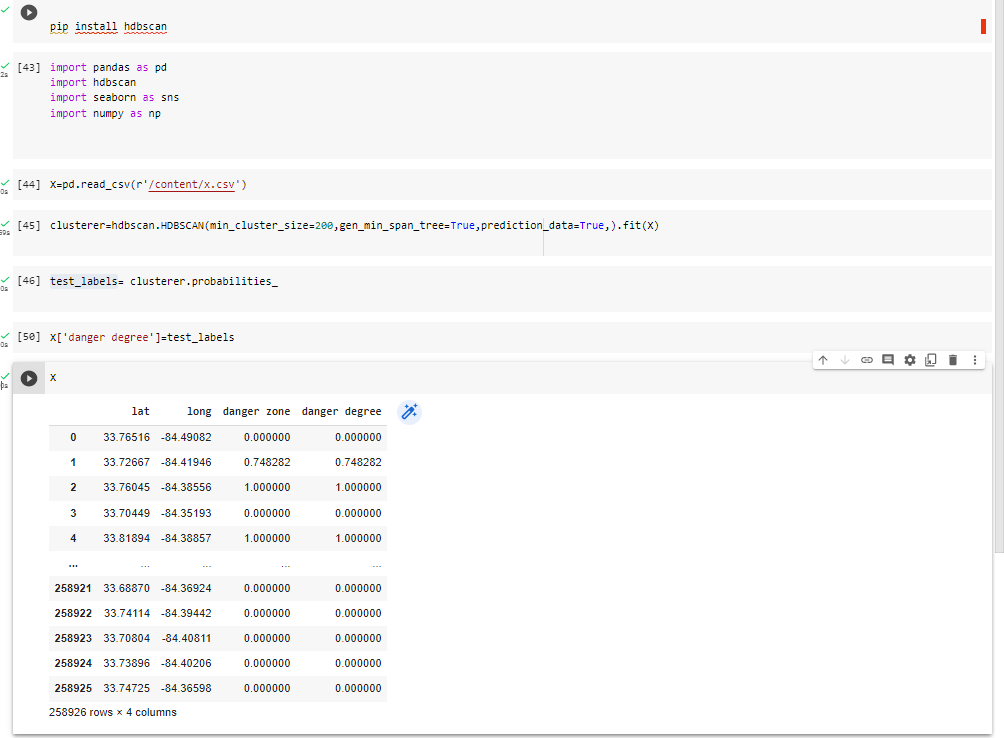


In [27]:
#uploading the csv file

df=pd.read_csv(r'/kaggle/input/related-to-the-atlanta-project/danger zone.csv')

In [28]:
df

,lat,long,danger degree
0,33.76516,-84.49082,0.000000
1,33.72667,-84.41946,0.748282
2,33.76045,-84.38556,1.000000
3,33.70449,-84.35193,0.000000
4,33.81894,-84.38857,1.000000
...,...,...,...
258921,33.68870,-84.36924,0.000000
258922,33.74114,-84.39442,0.000000
258923,33.70804,-84.40811,0.000000
258924,33.73896,-84.40206,0.000000


/opt/conda/lib/python3.7/site-packages/pandas/plotting/_matplotlib/tools.py:400: MatplotlibDeprecationWarning: 
The is_first_col function was deprecated in Matplotlib 3.4 and will be removed two minor releases later. Use ax.get_subplotspec().is_first_col() instead.
  if ax.is_first_col():


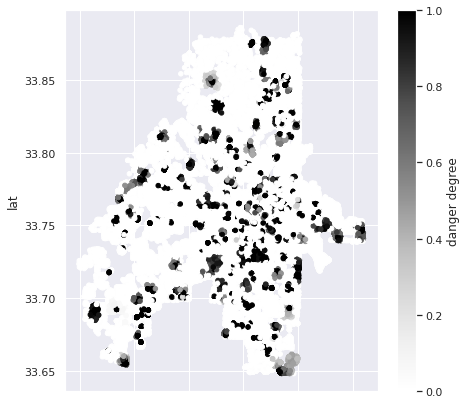

In [29]:
df.plot.scatter(y='lat',x='long',c='danger degree');


<font color='289C4E'> <h3>Observations</h3><font><a class='anchor' id='top'></a>
    
* the crime is more concentreted in the   **middle** of **Atlanta** 

* the **north east** seems to be the safest  
    
    
> we will try to check if this model works propley by using **Google maps**    
     
     

In [30]:
df[df['danger degree']==0].head()

,lat,long,danger degree
0,33.76516,-84.49082,0.0
3,33.70449,-84.35193,0.0
5,33.76204,-84.43066,0.0
7,33.73224,-84.50119,0.0
9,33.71851,-84.44718,0.0


* **33.76516	-84.49082****** : Dr. Mary Shy Scott Memorial Park , and it seems from the img it's family place
[here](https://www.google.com/maps/place/33%C2%B045'54.6%22N+84%C2%B029'27.0%22W/@33.76516,-84.4930087,17z/data=!3m1!4b1!4m4!3m3!8m2!3d33.76516!4d-84.49082)


* **** 33.70449	-84.35193**** : a church 
[here](https://www.google.com/maps?q=33.70449+-84.35193&um=1&ie=UTF-8&sa=X&ved=2ahUKEwiPsriL_Lv9AhUtTKQEHaBqC0MQ_AUoA3oECAEQBQ)


**we will dig by ourself this loction
**

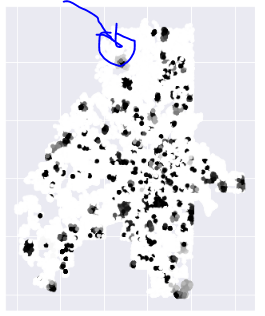






**33.8750309,-84.4379033,** :*it seems like a quite place , with fancy buildings *
[here](https://www.google.com/maps/place/33%C2%B052'30.1%22N+84%C2%B026'16.5%22W/@33.8750309,-84.440092,17z/data=!3m1!4b1!4m4!3m3!8m2!3d33.8750309!4d-84.4379033)

<font color='289C4E'> <h2>checking the danger zones</h2><font><a class='anchor' id='top'></a>


In [31]:
df[df['danger degree']==1].head()

,lat,long,danger degree
2,33.76045,-84.38556,1.0
4,33.81894,-84.38857,1.0
8,33.68841,-84.48742,1.0
12,33.73396,-84.40177,1.0
14,33.71691,-84.39276,1.0


**33.76045	-84.38556	1.0** : a garage 
[here](https://www.google.com/maps/place/33%C2%B045'37.6%22N+84%C2%B023'08.0%22W/@33.76045,-84.3877487,17z/data=!3m1!4b1!4m4!3m3!8m2!3d33.76045!4d-84.38556)


**33.81894	-84.38857** : a parking lot and a highway
[here](https://www.google.com/maps?q=33.81894+-84.38857&um=1&ie=UTF-8&sa=X&ved=2ahUKEwi6ybGH_rv9AhUVUqQEHX75DFMQ_AUoA3oECAEQBQ)


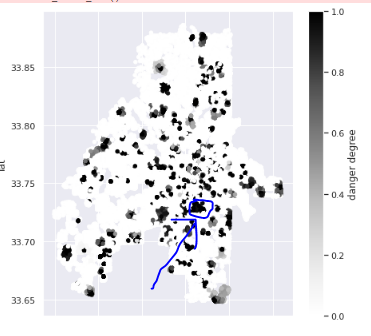


we will check this area by ourself 


**33.7175083,-84.3808676** : dumpster and abandoned house 
[here](https://www.google.com/maps/search/33.7175083,-84.3808676/@33.81894,-84.3907587,17z)

--------------------------------------------------------------------------------------------------------


 <font color='289C4E'> <h3>Conclusion</h3><font><a class='anchor' id='top'></a>
*    as we digged by ourself to check what the** value 1** means in **danger degree column** , and it reflects us to a **park** , **church** and a **fancy house** , which makes you conclude it has a **low crime rate** 
    
* on the other hand the **0 value **in **danger degree column** , reflects to a **garage** ,** a highway** , **dumpster** and **abonded house** which makes you conclude that because it'ss so crowded or so abonded it may lead to **high crime rate**. 
     
